# Home task 

## Home Task 1. Hypothesis Testing for Proportions

A company believes that percentage of resident in Ternopil own vehicle is `60%` or less. <br>
Sales manager disagree. He conducted a test surveying `250` residents and `170` responded yes to owning a vehicle. <br>

State the null hypothesis and alternative hypothesis. <br>
At 10% significance level, is there enough evidence to reject the null hypothesis?


**Note**: 
- Significance level is opposite to confidence level e.g. 10% significance level means 90% of confidence level.
- This is one taled task since is percentage `60%` **OR LESS**

### Expected result

<img src = "hometask1_expected.png" height=500 width= 500 align="left">


### Solution 

In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

$H_0$: p ≤ 0.60

$H_1$: p > 0.60

z_critical= 1.64, z_calculated= 2.58


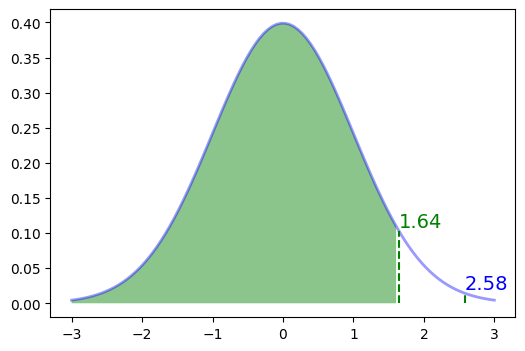

In [5]:
p = 0.6  # The null hypothesis
q = 1 - p  # Alternative hypothesis
n = 250
x = 170
alpha = 0.1  # significance level

p_hat = x / n  # Calculate the sample percentage

Confidence_level = 1 - alpha
Rejection_area = alpha / 2
Cumulative_area = Confidence_level + Rejection_area

Z_critical = norm.ppf(Cumulative_area)
Z_c = (p_hat - p) / np.sqrt((p * q) / n)
print(f'z_critical= {Z_critical:.2f}, z_calculated= {Z_c:.2f}')

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
x = np.linspace(-3, 3, 100)
ax.plot(x, norm.pdf(x), 'b-', lw=2, alpha=0.4, label='Gauss')

ax.plot ([Z_c, Z_c],[0, norm.pdf(Z_c)], 'g--')
ax.plot([Z_critical, Z_critical], [0, norm.pdf(Z_critical)], 'g--')
ax.text(Z_c, norm.pdf(Z_c) , '{:.3}'.format(Z_c), ha= 'left', va= 'bottom',color= 'b',fontsize= 14)
ax.text(Z_critical, norm.pdf(Z_critical), '{:.3}'.format(Z_critical), ha='left', va='bottom', color='g', fontsize=14)

x_fill = x[(x < Z_critical)]
ax.fill_between(x_fill, 0, norm.pdf(x_fill) , facecolors='green',alpha=0.45)  

### Conclusion for task_1

$Z_{c} = 2.58$ **in Rejection Area**, 

so $H_0$ is **REJECTED**. 


## Home Task 2. Hypothesis Testing Difference of Two Means 

A business owner is in the process of deciding whether or not to invest in a new factory that refines oil in order to meet the high demand that commodity. A test showed that the old factory refines oil at a mean rate of `3.1L` per second at a standard deviation of `1.0` using a samp of `40`. <br>
The new factory was measured to refine oil at a mean rate of `3.8L` per second at a standard deviation of `1.5` using a sample of `36`.

Determine if there is any major difference at 10% significance level



**Note**: Since sample size is larger than 30, you may use normal distribution to compute the **z-critical**. 

To compute the **z-value** (z-calculated for two means) use the same formula as for **t-value** above: 

$$\large{ z_{calculated}  = \frac {(\bar{x_1}-\bar{x_2}) - (\mu_1 - \mu_2)}
{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}}
$$

### Solution 

Null hypothesis:  $\mu_1 = \mu_2$
Alternative hypothsis  $\mu_1 \ne \mu_2$

Z_critical= 1.64, Z_calculated= -2.37


Text(-2.3664319132398455, 0.024259705055058447, '-2.37')

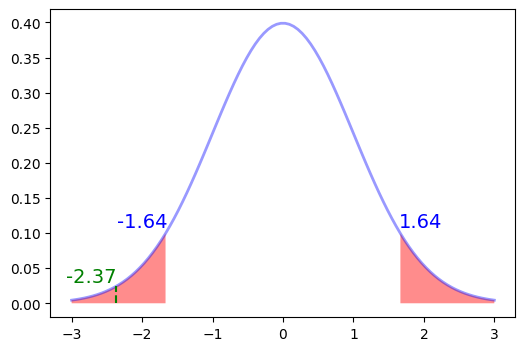

In [6]:
# Old factory
n_1 = 40
x_1 = 3.1
sigma_1 = 1
mu_1 = 0

# New factory
n_2 = 36
x_2 = 3.8
sigma_2 = 1.5
mu_2 = 0

alpha = 0.1  # Significance level
Confidence_level = 1 - alpha

Z_critical = norm.ppf(Confidence_level + (alpha / 2))
Z_c = ((x_1 - x_2) - (mu_1 - mu_2)) / np.sqrt((sigma_1**2/n_1) + (sigma_2**2/n_2))
print(f'Z_critical= {Z_critical:.2f}, Z_calculated= {Z_c:.2f}')

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
x = np.linspace(-3, 3, 100)
ax.plot(x, norm.pdf(x), 'b-', lw=2, alpha=0.4, label='Gauss')

x_left = x[x < -Z_critical]
x_right = x[x > Z_critical]
ax.fill_between(x_left, 0, norm.pdf(x_left), facecolors='red', alpha=0.45)
ax.fill_between(x_right, 0, norm.pdf(x_right), facecolors='red', alpha=0.45)


ax.plot([Z_c, Z_c], [0, norm.pdf(Z_c)], 'g--')

ax.text(-Z_critical, norm.pdf(Z_critical),'{:.3}'.format(-Z_critical), ha='right', va='bottom', color='blue', fontsize=14)
ax.text(Z_critical, norm.pdf(Z_critical), '{:.3}'.format(Z_critical), ha='left', va='bottom', color='blue', fontsize=14)
ax.text(Z_c, norm.pdf(Z_c), '{:.3}'.format(Z_c),ha='right', va='bottom', color='g', fontsize=14)

### Conclusion for problem_2

$Z_{c} = -2.37$ is not in the FTR (Fail To Reject) region $(-1.64; 1.64)$, 

so $H_0$ is **REJECTED**.